## Crawling Data with API

In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [11]:
# using sandbox as it's only available for paid subscriptions
url = 'https://cloud.iexapis.com/stable/stock/AAPL/book'

In [12]:
parameters = {
#     'token': 'Tsk_83f2c0eee6bb4600b8d8f9936a5769f2'
    'token': 'sk_b8918e562940417ca9b6615a914b75bd'
}
headers = {
    'Accepts': 'application/json'
}

In [13]:
session = Session()
session.headers.update(headers)

In [18]:
try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [19]:
print(data)

{'quote': {'symbol': 'AAPL', 'companyName': 'Apple Inc', 'primaryExchange': 'NASDAQ/NGS (GLOBAL SELECT MARKET)', 'calculationPrice': 'close', 'open': 122.63, 'openTime': 1607956201618, 'openSource': 'official', 'close': 121.78, 'closeTime': 1607979601546, 'closeSource': 'official', 'high': 123.35, 'highTime': 1607979584312, 'highSource': '15 minute delayed price', 'low': 121.7, 'lowTime': 1607979595010, 'lowSource': 'IEX Last Trade', 'latestPrice': 121.78, 'latestSource': 'Close', 'latestTime': 'December 14, 2020', 'latestUpdate': 1607979601546, 'latestVolume': 79075988, 'iexRealtimePrice': 121.7, 'iexRealtimeSize': 22, 'iexLastUpdated': 1607979595010, 'delayedPrice': 121.8, 'delayedPriceTime': 1607979584290, 'oddLotDelayedPrice': 121.79, 'oddLotDelayedPriceTime': 1607979584212, 'extendedPrice': 121.86, 'extendedChange': 0.08, 'extendedChangePercent': 0.00066, 'extendedPriceTime': 1607993993567, 'previousClose': 122.41, 'previousVolume': 86939786, 'change': -0.63, 'changePercent': -0.0

In [7]:
len(data)

4

In [8]:
import numpy as np
import pandas as pd

In [9]:
bids = pd.DataFrame(data['bids'])
asks = pd.DataFrame(data['asks'])
trades = pd.DataFrame(data['trades'])

KeyError: 'trades'

In [ ]:
print(len(bids), len(asks), len(trades))

## Preprocessing Data

In [12]:
# bids['date'] = pd.to_datetime(bids['timestamp'], unit='ms')
# asks['date'] = pd.to_datetime(asks['timestamp'], unit='ms')
trades['date'] = pd.to_datetime(trades['timestamp'], unit='ms')

### Describe Data

In [13]:
bids

""


In [14]:
asks

""


In [15]:
trades

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp,date
0,122.41,100,1865481372,True,False,False,False,False,1607720397799,2020-12-11 20:59:57.799
1,122.29,1100,1864529704,False,False,False,False,False,1607720395364,2020-12-11 20:59:55.364
2,122.31,200,1861853424,False,False,False,False,False,1607720388355,2020-12-11 20:59:48.355
3,122.29,5,1861796795,True,True,False,False,False,1607720388156,2020-12-11 20:59:48.156
4,122.30,138,1861737675,True,False,False,False,False,1607720388071,2020-12-11 20:59:48.071
5,122.30,22,1861431572,True,True,False,False,False,1607720387013,2020-12-11 20:59:47.013
6,122.29,25,1861343018,True,True,False,False,False,1607720386668,2020-12-11 20:59:46.668
7,122.36,300,1860645880,True,False,False,False,False,1607720385111,2020-12-11 20:59:45.111
8,122.39,300,1860154507,True,False,False,False,False,1607720383612,2020-12-11 20:59:43.612
9,122.41,80,1860000793,False,True,False,False,False,1607720383387,2020-12-11 20:59:43.387


### Save to CSV

In [16]:
bids.to_csv('bids/1.csv')
asks.to_csv('asks/1.csv')
trades.to_csv('trades/1.csv')

### Plot data

In [33]:
import matplotlib.pyplot as plt

In [74]:
trades = trades.sort_values('timestamp')

In [75]:
asks = asks.sort_values('timestamp')

In [76]:
bids = bids.sort_values('timestamp')

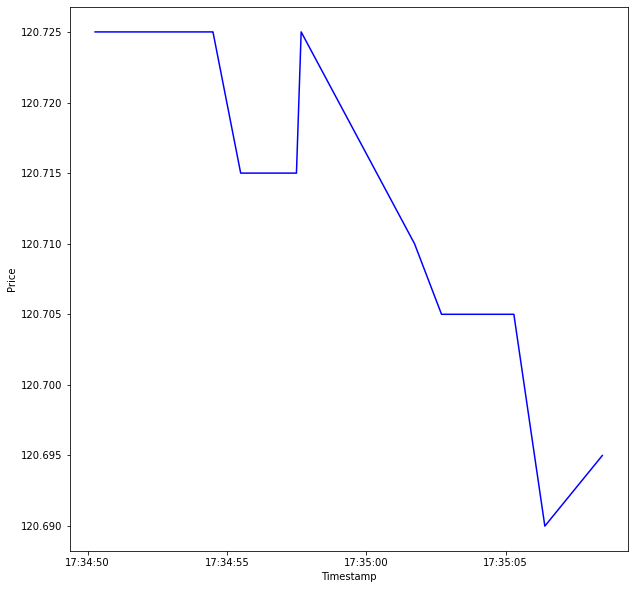

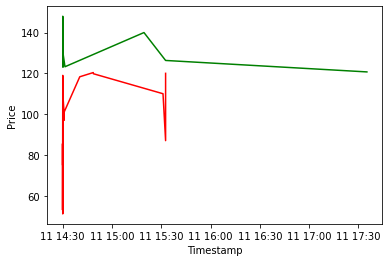

In [91]:
fig = plt.figure(num=2,figsize=(10,10))
plt.plot(trades['date'], trades['price'],'b')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()
plt.plot(bids['date'], bids['price'],'r')
plt.plot(asks['date'], asks['price'],'g')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()